Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt
from IPython.display import Image

In [3]:
%matplotlib inline

In [4]:
# sympy
import sympy as sy
from sympy import symbols
from sympy import simplify, expand, collect, cancel, apart, trigsimp
from sympy import integrate, diff, series
sy.init_printing(use_unicode = True)

# Angles d'Euler

Les angles d'Euler sont définis pas la matrice de rotation entre le repère fixe $(\bm e_X, \bm e_Y, \bm e_Z)$ et le repère du corps (mobile)  $(\bm e_x, \bm e_y, \bm e_z)$:
$$ \begin{pmatrix} \bm e_x & \bm e_y & \bm e_z \end{pmatrix} = \begin{pmatrix} \bm e_X & \bm e_Y & \bm e_Z \end{pmatrix} R(\phi,\theta,\psi) ,$$
avec,
$$R(\phi,\theta,\psi) = R_Z(\phi) R_X(\theta) R_Z(\psi),$$
soit
$$R(\phi, \theta, \psi) = \begin{pmatrix}
- \cos\theta  \sin\psi \sin\phi + \cos\psi \cos\phi & -\cos\theta \sin\psi \cos\phi - \cos\psi \sin\phi & \sin\theta \sin\psi \\ \cos\theta \cos\psi \sin\phi + \sin\psi \cos\phi & \cos\theta \cos\psi \cos\phi - \sin\psi \sin\phi & - \sin\theta \cos\psi \\ \sin\theta \sin\phi & \sin\theta \cos\phi & \cos\theta \end{pmatrix}$$

Si les coordonnées d'un vecteur dans le repère mobile sont $(x,y,z)$, dans le repère fixe elles sont données par:
$$\begin{pmatrix} x \\ y \\ z \end{pmatrix} = C(\phi,\theta, \psi) \begin{pmatrix} X \\ Y \\ Z \end{pmatrix},$$
où $C= R^T$ est la matrice de changement de coordonnées (transposée de la rotation d'Euler).

In [5]:
psi, theta, phi = symbols("psi, theta, phi", real=True)

def C_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, s],
                  [0, -s,  c]])
def C_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, -s],
                  [ 0, 1, 0],
                  [ s, 0, c]])

def C_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, s, 0],
                  [-s,  c, 0],
                  [0,  0, 1]])

def XYZ():
    return sy.Matrix([1,0,0]), sy.Matrix([0,1,0]), sy.Matrix([0,0,1])

# Rotation d'un triangle

[Text(0, 0.0, '$0$'), Text(0, 1.5, '$h$')]

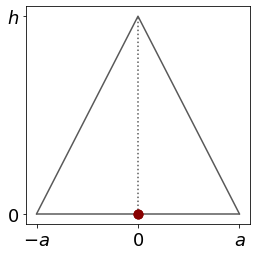

In [6]:
N = 65
x = np.linspace(-1,1,N)
y = -1.5*np.abs(x) + 1.5
fig, ax = plt.subplots(figsize = (4,4))
ax.plot(x, y, color = '0.35')
ax.plot([-1,1], [0,0], color = '0.35')
ax.plot([0,0], [0,1.5], ":", color = '0.35')
ax.plot([0,0], [0,0], ".", color = '#800', ms = 18)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(["$-a$", "$0$", "$a$"], fontsize = 18)
ax.set_yticks([0, 1.5])
ax.set_yticklabels(["$0$", "$h$"], fontsize = 18)

On a un triangle $y=-(b/a) |x| + h$, et on veut calculer son moment d'inertie (en prennant $(0,0)$ comme centre de coordonnées associées au corps).

In [8]:
x, y = sy.symbols("x, y", real=True)
a, h = sy.symbols("a h", real=True)
rho, M = sy.symbols("rho M", real=True)

In [9]:
# intégrale double sur le triangle
def I_triangle(f):
    return sy.integrate(sy.integrate(f, (y, 0,  (h/a)*x + h)), (x, -a, 0)) +\
           sy.integrate(sy.integrate(f, (y, 0, -(h/a)*x + h)), (x, 0, a))

In [10]:
# aire du triangle A, on a M = rho A
A = I_triangle(1)
A

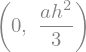

In [11]:
# centre de masse
Rx = I_triangle(x)
Ry = I_triangle(y)
Rx, Ry

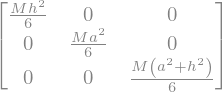

In [12]:
# inertie
# I_xx, I_yy, I_zz = I_xx + I_yy, I_xy = I_yx = 0
I_xx = (M/A) * I_triangle(y**2)
I_yy = (M/A) * I_triangle(x**2)
I_xy = (M/A) * I_triangle(x*y)
I_zz = sy.simplify(I_xx + I_yy)

I = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I

On calcule $\bm R$ et $I$ par rapport au point $O=(0,0,0)$, située sur l'axe de symétrie du triangle isoscèle, et dans le repère $(x,y,z)$ fixé au corps (mobile).

* Centre de masse: 
    $$\bm R = \frac{ah^2}{3} \hat{\bm y}$$
* Moment d'inertie:
    $$I = \frac{M}{6}\mathrm{diag}(h^2, a^2, a^2 + h^2)$$

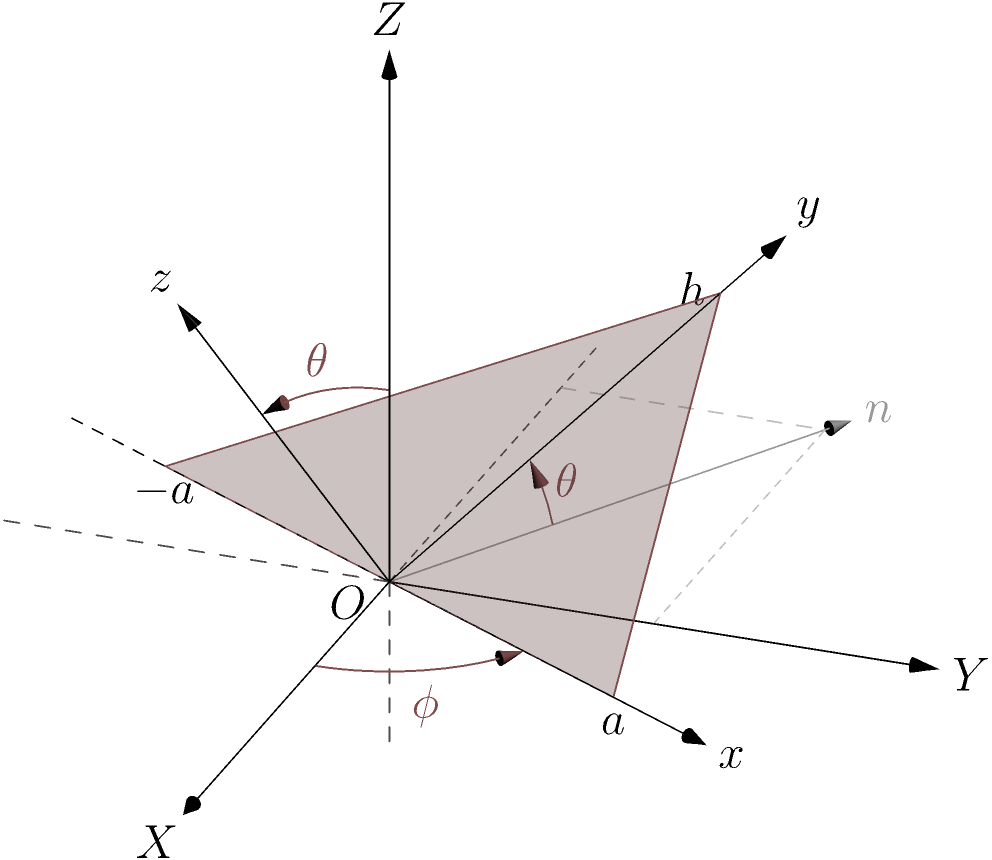

In [18]:
Image(filename='triangle.png', width=300)

## Cinématique

Le repère fixe est noté $(\hat{\bm X},\hat{\bm Y},\hat{\bm Z})$, le repère mobile est $(\hat{\bm x}, \hat{\bm y},\hat{\bm z})$.

L'orientation du triangle par rapport au repère fixe s'obtient par 
* une rotation d'angle $\psi$ autour de $Z$, ce qui produit la transformation de repère $(X,Y,Z) \rightarrow (X'=N,Y'=n,Z)$,
* suivie d'une rotation d'angle $\theta$ autrour de $N$, ce qui resulte dans le repère mobile $(N,Y',Z) \rightarrow (x,y,z)$.Notez que $N=x$.

On a donc un cas particulier des angles d'euler avec $\phi=0$. Les angles $\theta = \theta(t)$ et $\psi=\psi(t)$, sont fonction du temps et décrivent la rotation du triangle autour de $Z$ et de $x$.

Le triangle est contraint de tourner dans le plan $XY$ autour de point $O= (0,0,0)$ (origine de des repères mobile et fixe). Il convient par conséquent d'utiliser le repère
$$(\hat{\bm x}(t), \hat{\bm n}(t),\hat{\bm Z})$$
pour décrire la cinématique du triangle.

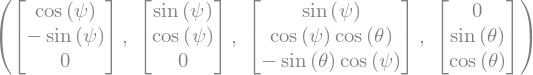

In [63]:
# repères (X,Y,Z) et (x,n,Z) en coordonnées (x,y,z)
ex, ey, ez = XYZ()
eX = C_z(psi)*ex
en = C_z(psi)*ey
eY = C_x(theta)*C_z(psi)*ey
eZ = C_x(theta)*C_z(psi)*ez

eX, en, eY, eZ

In [39]:
# dérivés des angles
psi_t, theta_t, phi_t = sy.symbols("psi_t, theta_t, phi_t", real=True)

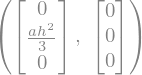

In [40]:
# vitesse du centre de masse
R = (a*h**2/3)*ey
V = sy.simplify(theta_t*diff(R,theta) + psi_t*diff(R,psi))
R, V

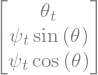

In [43]:
# vitesse angulaire (dans xyz)
w = psi_t*eZ + theta_t*ex
w_x, w_y, w_z = w[0], w[1], w[2]
w

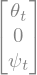

In [73]:
# vitesse angulaire (dans xnZ)
wn = sy.simplify(C_x(theta).T*w)
wn

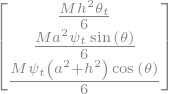

In [75]:
# moment cinétique (dans xyz)
Lx = sy.simplify(I_xx * w_x*ex + I_yy * w_y*ey + I_zz * w_z*ez)
Lx

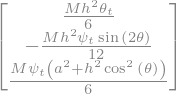

In [76]:
# moment cinétique (dans xnZ)
L = sy.simplify(C_x(theta).T*Lx)
L

### Repère $(x, n, Z)$
Vitesse angulaire:
$$\bm \Omega = \dot{\theta} \hat{\bm x}  + \dot{\psi} \hat{\bm z} $$
Moment cinétique:
$$\bm L= \frac{Mh^2}{6}\dot{\theta} \hat{\bm x} - 
\frac{Mh^2}{12}\dot{\psi} \sin(2\theta) \hat{\bm n} +
\frac{Ma^2}{6}\dot{\psi}\left(1 + \frac{h^2}{a^2} \cos^2\theta\right) \hat{\bm Z}$$

*Remarque*: le moment cinétique dans le repère $xnZ$ n'est pas $I\bm \Omega$, avec la vitesse angulaire dans $xnZ$: il faut aussi transformer le tenseur d'inertie! On calcule donc $\bm L$ dans le repère mobile, et on transforme les coordonnées du vecteur dans le repère souhaité, ici $xnZ$.

La variation du moment cinétique, due à la rotation $\Omega$ (du coprs, dans ses coordonnées xyz) est donnée par le produit vectoriel
$$\left.\bm \Omega \times \bm L\right|_{xyz}$$

## Équation d'euler

On calcule:
$$\left. \frac{\D \bm L}{\D t} \right|_{XYZ} = \left. \frac{\D \bm L}{\D t} \right|_{xnZ} + \left. \bm \omega \times \bm L\right|_{xnZ}$$

In [77]:
# dérivées deuxièmmes
psi_tt, theta_tt, phi_tt = sy.symbols("psi_tt, theta_tt, phi_tt", real=True)

### Terme de variation temporelle
On calcule d'abord la variation de $\bm L$ due au changement temporelle du repère $xnZ$ par rapport au fixe:

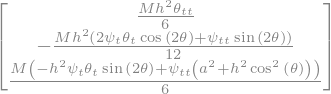

In [78]:
# dérivée du moment cinétique
dL = sy.simplify(theta_t*diff(L,theta) + theta_tt*diff(L,theta_t) + \
                 psi_t*diff(L,psi) + psi_tt*diff(L,psi_t))
dL

### Terme de variation angulaire
On calcule ensuite la variation associée au changement d'orientation (rotation) entre les repères. On a $\bm L$ dans le repère $xnZ$, la rotation instantanée de ce repère par rapport au repère fixe $XYZ$ est:
$$\bm \omega = \dot{\psi} \hat{\bm Z}$$
Le produit vectoriel $\bm \omega \times \bm L$ est:

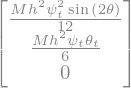

In [79]:
w0 = wn[2]*ez
dLw = sy.simplify(w0.cross(L))
dLw

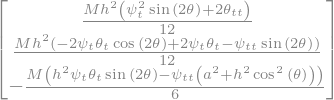

In [80]:
sy.simplify(dL + dLw)

On obtient enfin le résultat final:
$$\left. \frac{\D \bm L}{\D t} \right|_{XYZ} = \frac{Mh^2}{6}\begin{pmatrix}
\ddot{\theta} + \frac{\dot{\psi}^2}{2} \sin2\theta \\
-\frac{\ddot{\psi}}{2} \sin2\theta + \dot{\theta}\dot{\psi}(1 - \cos2\theta) \\
\ddot{\psi}(a^2/h^2 + \cos^2\theta) - \dot{\theta}\dot{\psi}\sin2\theta 
\end{pmatrix}$$

# Figure

```cpp
import settings;
render = 4;
prc = false;

import three;
import solids;
texpreamble("\usepackage{bm}");

size(250, 0);

currentprojection  =  orthographic(8, 3, 4);

real s = 1.2;
pen pk = rgb(0, 0, 0);
pen pr = rgb(0.5, 0.3, 0.3);
pen pg = rgb(0.3, 0.3, 0.3);

// fixed axes
triple O = (0,0,0);
real u = 2;
triple X = (u,0,0);
triple Y = (0,u,0);
triple Z = (0,0,u);
draw(Label("$X$", 1), O--X, pk, Arrow3);
draw(Label("$Y$", 1), O--Y, pk, Arrow3);
draw(Label("$Z$", 1), O--Z, pk, Arrow3);
label("$O$", O, (0.5,-1.7,-1.0));

draw(O--(-X), dashed+pg);
draw(O--(-0.7*Y), dashed+pg);
draw(O--(-0.3*Z), dashed+pg);

// triangle
real a = 1.2;
real h = 1.7;
real theta = 40;
real t = theta*pi/180;
real phi = 60;
real q = phi*pi/180;
triple x = (cos(q),sin(q),0);
triple n = (-sin(q),cos(q),0);
triple y = (-sin(q),cos(t)*cos(q),sin(t)*cos(q));
triple z = (0,-sin(t),cos(t));
draw(Label("$x$", 1), O--h*x, pk, Arrow3);
draw(O--(-h*x), dashed+pk);
draw(Label("$y$", 1), O--s*h*y, pk, Arrow3);
draw(Label("$n$", 1), O--s*h*n, gray(0.6), Arrow3);
draw(Label("$z$", 1), O--s*z, pk, Arrow3);

draw((-1.6*a*sin(q),0,0)--(-1.6*a*sin(q),1.6*a*cos(q),0)--(0,1.6*a*cos(q),0), dashed+gray(0.75));

path3 triangle = a*x--h*y--(-a*x)--cycle;
draw(surface(triangle), pr+opacity(0.3));
draw(triangle, pr);

label("$-a$", -a*x+(0,0,-0.1));
label("$a$", a*x+(0,0,-0.1));
label("$h$", h*y+(0,-0.1,0));

// angles
draw("$\phi$", arc(O, 0.6*a, 90, 0, 90, phi),  pr, Arrow3);
draw(Label("$\theta$"), arc(O, (0,0,0.6*a), 0.6*a*z),  pr, Arrow3);
draw(Label("$\theta$"), arc(O, 0.6*a*n, 0.6*a*y),  pr, Arrow3);

```

# Brouillon

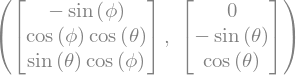

In [15]:
C_x(-theta)*C_z(-phi)*ey, C_x(-theta)*C_z(-phi)*ez

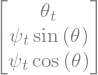

In [15]:
# vitesse angulaire: d'après la formule générale
eZ = C_z(phi)*C_x(theta)*ez
eN = C_z(phi)*C_x(theta)*ex
Omega = phi_t*ez + theta_t*eN + psi_t*eZ
Omega
w = Omega.subs([(phi,0), (phi_t,0)])
w_x, w_y, w_z = w[0], w[1], w[2]
w